# Box-Cox

Lambda value used for Transformation: 0.26628876431402354


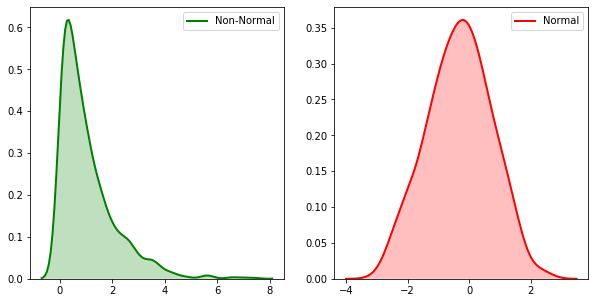

In [13]:
# import modules
import numpy as np
import pandas as pd
from scipy import stats

# plotting modules
import seaborn as sns
import matplotlib.pyplot as plt

# generate non-normal data (exponential)
n = 1000
original_data = np.random.exponential(size = n)
data = {
    'ID': list(range(n)), 
    'OriData': list(original_data)
}
df = pd.DataFrame(data=data)

# transform training data & save lambda value
fitted_data, fitted_lambda = stats.boxcox(original_data)
df['Fitted_Data'] = fitted_data

# creating axes to draw plots
fig, ax = plt.subplots(1, 2)

# plotting the original data(non-normal) and
# fitted data (normal)
sns.distplot(original_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Non-Normal", color ="green", ax = ax[0])

sns.distplot(fitted_data, hist = False, kde = True,
            kde_kws = {'shade': True, 'linewidth': 2},
            label = "Normal", color ="red", ax = ax[1])

# adding legends to the subplots
plt.legend(loc = "upper right")

# rescaling the subplots
fig.set_figheight(5)
fig.set_figwidth(10)

print(f"Lambda value used for Transformation: {fitted_lambda}")


In [33]:
mean = df.Fitted_Data.mean()
std = df.Fitted_Data.std()
lower, upper = mean - 2*std, mean + 2*std
df['abnomaly'] = df['Fitted_Data'].apply(lambda x: 0 if (lower < x and x < upper) else 1)
df[df['abnomaly'] == 1].ID.tolist()

[33,
 54,
 84,
 138,
 177,
 179,
 302,
 323,
 330,
 343,
 369,
 409,
 428,
 431,
 445,
 453,
 459,
 467,
 501,
 545,
 579,
 582,
 639,
 668,
 680,
 684,
 708,
 715,
 790,
 794,
 806,
 818,
 826,
 834,
 870,
 906,
 914,
 936]

# Box Plot

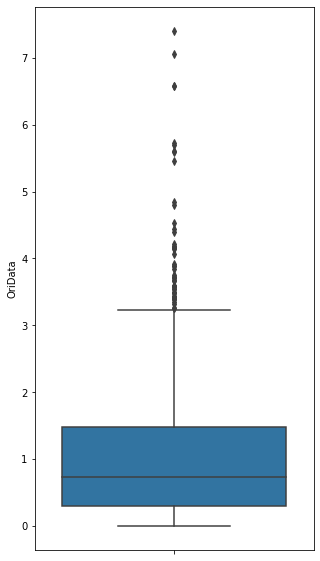

In [50]:
fig, ax = plt.subplots(1, 1)
sns.boxplot(y=df.OriData)
fig.set_figheight(10)
fig.set_figwidth(5)

# Time Series Detection

## Method 1: Moving Average

## Method 2: STL

In [ ]:


import statsmodels.api as sm

from statsmodels.tsa.seasonal import seasonal_decompose

# Multiplicative Decomposition

result_mul = seasonal_decompose(data1, model=’multiplicative’, extrapolate_trend=’freq’)

Actual_Values = result_mul.seasonal * result_mul.trend * result_mul.resid
# Additive Decomposition

result_add = seasonal_decompose(data1, model=’additive’, extrapolate_trend=’freq’)

Actual_Values = result_mul.seasonal + result_mul.trend + result_mul.resid

In [ ]:
# Multivariate: Isolation Forest/ 聚类模型、孤立森林模型、one-class svm模型

In [ ]:
from sklearn.ensemble import IsolationForest

IsolationForest(*, n_estimators=100, max_samples=’auto’, contamination=’auto’, max_features=1.0, bootstrap=False, n_jobs=None, random_state=None, verbose=0, warm_start=False)